In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from IPython.display import display

In [78]:
f = open('elevator/scores.txt', 'r')
naive_scores = []
rl_scores = []
mc_scores = []
while True:
    params = f.readline()
    if not params:
        break
    scores = [-float(x.strip().split('\r\n')[0]) for x in f.readline().split(',')]
    if 'RL' in params:
        rl_scores += [(params, scores)]
    elif 'Monte' in params:
        mc_scores += [(params, scores)]
    else:
        naive_scores += [(params, scores)]
f.close()

In [70]:
def hist_scores(title, scores, ax):
    ax.hist(scores)
    ax.set_title(title)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')
    ax.axvline(np.mean(scores), color='r', linestyle='dashed', linewidth=2)
    ax.legend(['Average (%.2f)' % np.mean(scores), 'Runs'])
    return ax
#     plt.show()

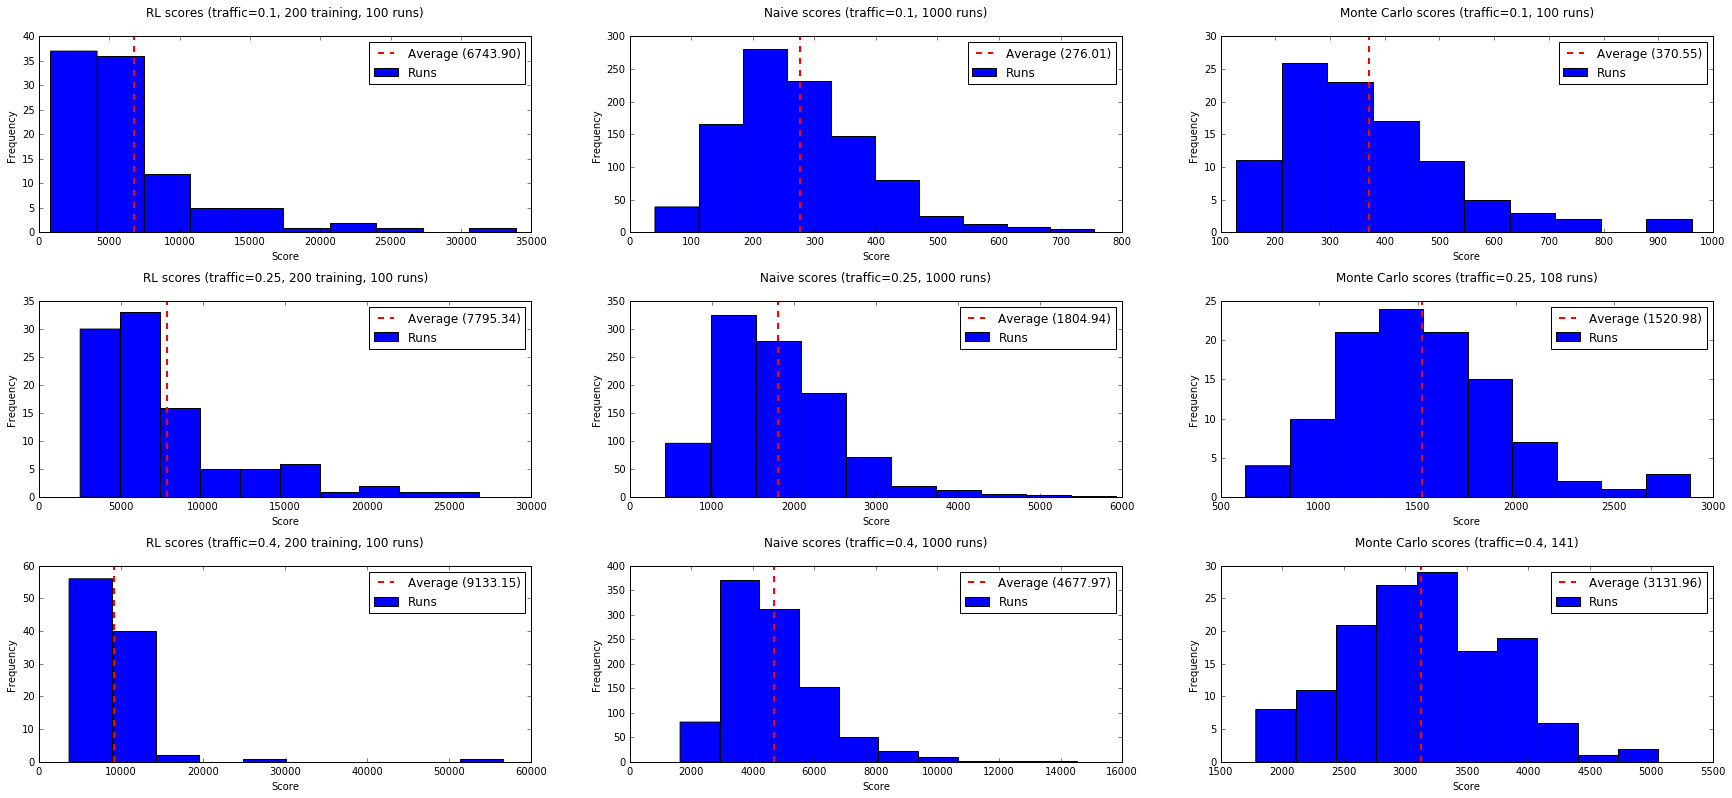

In [82]:
fig, ax = plt.subplots(3, 3, figsize = (30,13))
col = 0
for score_groups in [rl_scores, naive_scores, mc_scores]:
    row = 0
    for title, scores in score_groups:
        ax[row, col] = hist_scores(title, scores, ax[row, col])
        row += 1
    col += 1
fig.subplots_adjust(hspace=.35)